# DECISION TREE (LACE)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import seaborn as sns

# The normal imports
from numpy.random import randn

# Import the stats librayr from numpy
from scipy import stats
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB #SciKitLearn GaussianNB Naive Bayes import
from sklearn import tree ##SciKitLearn GaussianNB Naive Bayes import
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm


# Command so that plots appear in the iPython Notebook
%matplotlib inline

train = pd.read_csv('SumStudentClicksxResult-2-0-50.csv')   # better be in the correct directory!
test = pd.read_csv('SumStudentClicksxResult-2-50-100.csv')
test.head(5)

,id_student,SumOfsum_click,final_result
0,100893,250,Pass
1,101781,891,Pass
2,102806,486,Pass
3,102952,242,Pass
4,1035023,496,Pass


In [2]:
train.head(5)

,id_student,SumOfsum_click,final_result
0,100893,206,Pass
1,101781,1505,Pass
2,102806,590,Pass
3,102952,444,Pass
4,1035023,459,Pass


In [3]:
cols = ['SumOfsum_click']
cols2 = ['final_result']

trainArr = train[cols].to_numpy()
trainRes = train[cols2].to_numpy()

testArr = test[cols].to_numpy()
testRes = test[cols2].to_numpy()

#depreciated transformation to numpy array
# trainArr = train.to_numpy(cols)
# trainRes = train.to_numpy(cols2)

# testArr = test.to_numpy(cols)
# testRes = test.to_numpy(cols2)

#clf = GaussianNB()
clf = tree.DecisionTreeClassifier()

# print(trainArr[0])
# print(trainRes[0])
# print(testArr[0])
# print(testRes[0])

output = clf.fit(trainArr, trainRes).predict(testArr)

for i in range(390):
    #if testRes[i][0] == output[i] and testRes[i]=="Distinction":
    #if testRes[i][0] == output[i] and testRes[i]<>"Pass":
    if testRes[i][0] == output[i]:
        print('CORRECT   ' + str(output[i]) + "   " + str(testRes[i]))
        #print("PREDICTION:  " + str(output[i]) + "  " + str(testArr[i]) + "  " + str(testRes[i]) + "     RIGHT")
    else:
        print('INCORRECT ' + str(output[i]) + "   " + str(testRes[i]))
        #print("PREDICTION:  " + str(output[i]) + "  " + str(testArr[i]) + "  " + str(testRes[i]) + "     WRONG")

INCORRECT Fail   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Withdrawn   ['Withdrawn']
CORRECT   Pass   ['Pass']
INCORRECT Fail   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
INCORRECT Withdrawn   ['Pass']
CORRECT   Pass   ['Pass']
INCORRECT Withdrawn   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
INCORRECT Fail   ['Pass']
INCORRECT Distinction   ['Pass']
INCORRECT Pass   ['Withdrawn']
INCORRECT Fail   ['Pass']
INCORRECT Pass   ['Distinction']
INCORRECT Fail   ['Pass']
INCORRECT Fail   ['Withdrawn']
INCORRECT Fail   ['Pass']
INCORRECT Fail   ['Withdrawn']
INCORRECT Distinction   ['Pass']
CORRECT   Fail   ['Fail']
INCORRECT Fail   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
INCORRECT Pass   ['Withdrawn']
INCORRECT Pass   ['Fail']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
INC

In [4]:
correct = 0.0

for i in range(len(output)): 
    if testRes[i][0] == output[i]: 
        correct += 1
    
print(correct / len(output))


#print("Accuracy: " + gnb.score(testArr, testRes))
print("Accuracy: " + str(clf.score(testArr, testRes)))

0.5370843989769821
Accuracy: 0.5370843989769821


In [5]:
expected = testRes
predicted = clf.predict(testArr)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

 Distinction       0.11      0.10      0.10        21
        Fail       0.21      0.32      0.25        50
        Pass       0.71      0.69      0.70       275
   Withdrawn       0.07      0.04      0.05        45

    accuracy                           0.54       391
   macro avg       0.27      0.29      0.28       391
weighted avg       0.54      0.54      0.54       391

[[  2   2  16   1]
 [  0  16  31   3]
 [ 15  48 190  22]
 [  1  11  31   2]]


In [6]:
count=0 
passn=0
fail=0
distinction=0
withdrawn=0
for i in range(len(output)): 
    count += 1
    if testRes[i][0]=='Pass':
        passn += 1
    if testRes[i][0]=='Fail':
        fail += 1
    if testRes[i][0]=='Distinction':
        distinction += 1
    if testRes[i][0]=='Withdrawn':
        withdrawn += 1
print ("Pass: " + str(passn))
print ("Fail: " + str(fail))
print ("Distinction: " + str(distinction))
print ("Withdrawn: " + str(withdrawn))
    

Pass: 275
Fail: 50
Distinction: 21
Withdrawn: 45


# OUR VERSION OF THE DATASET

In [7]:
vle_train = pd.read_csv('studentVleTrain.csv')
vle_test = pd.read_csv('studentVleTest.csv')

info_train = pd.read_csv('studentInfoTrain.csv')
info_test = pd.read_csv('studentInfoTest.csv')

In [8]:
vle_train.head(5)
info_train.head(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
1,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
2,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass
3,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass
4,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass


In [9]:
#for now, select only course AAA and 2013
vle_train_a = vle_train.loc[(vle_train.code_module == 'AAA') & (vle_train.code_presentation == '2013J')]
vle_test_a = vle_test.loc[(vle_test.code_module == 'AAA') & (vle_test.code_presentation == '2013J')]

#reduce vle set to only include relevant columns
vle_train_a = vle_train_a[['id_student', 'date', 'sum_click']]
vle_test_a = vle_test_a[['id_student', 'date', 'sum_click']]

#group vle data on student id and date, while summing the clicks
vle_train_group = vle_train_a.groupby(['id_student', 'date']).agg({'sum_click':'sum'}).reset_index()
vle_test_group = vle_test_a.groupby(['id_student', 'date']).agg({'sum_click':'sum'}).reset_index()

#for now, select only course AAA and 2013 of demo info
info_train_a = info_train.loc[(info_train.code_module == 'AAA') & (info_train.code_presentation == '2013J')]
info_test_a = info_test.loc[(info_test.code_module == 'AAA') & (info_test.code_presentation == '2013J')]

#reduce info set to only include relevant columns
info_train_a = info_train_a[['id_student', 'gender', 'highest_education', 'num_of_prev_attempts', 'final_result']]
info_test_a = info_test_a[['id_student', 'gender', 'highest_education', 'num_of_prev_attempts', 'final_result']]

info_train_a.loc[info_train_a['final_result'] == 'Distinction', ['final_result']] = 'Pass' 
info_train_a.loc[info_train_a['final_result'] == 'Withdrawn', ['final_result']] = 'Fail'

info_test_a.loc[info_test_a['final_result'] == 'Distinction', ['final_result']] = 'Pass' 
info_test_a.loc[info_test_a['final_result'] == 'Withdrawn', ['final_result']] = 'Fail'

#change num_of_prev_attempts to boolean, need to only run this once
info_train_a.loc[info_train_a['num_of_prev_attempts'] > 0, ['num_of_prev_attempts']] = 'y'      
info_train_a.loc[info_train_a['num_of_prev_attempts'] == 0, ['num_of_prev_attempts']] = 'n'

info_train_a = info_train_a.rename(columns={"num_of_prev_attempts": "continued"})
                        
info_test_a.loc[info_test_a['num_of_prev_attempts'] > 0, ['num_of_prev_attempts']] = 'y'      
info_test_a.loc[info_test_a['num_of_prev_attempts'] == 0, ['num_of_prev_attempts']] = 'n'

info_test_a = info_test_a.rename(columns={"num_of_prev_attempts": "continued"})



#list and number of unique students in course AAA (*train)
unique_train = vle_train_a['id_student'].unique()
print('Number of unique students in TRAIN: %s' % (vle_train_a['id_student'].nunique()))

#list and number of unique students in course AAA (*test)
unique_test = vle_test_a['id_student'].unique()
print('Number of unique students in TEST: %s' % (vle_test_a['id_student'].nunique()))



#creating dataframe for all combinations of students and dates to merge with all_train 
student_train = pd.DataFrame(data=unique_train, columns=['id_student'])
date_train = pd.DataFrame(pd.Series(range(-10, 269)), columns=['date'])

student_train['one'] = 1
date_train['one'] = 1
all_dates_train = pd.merge(student_train, date_train, on='one').drop('one', axis=1)

#merging with all_train and adding value of 0 to sum_click on inactive days
all_train = pd.merge(all_dates_train, vle_train_group, how = 'outer', on = ['id_student', 'date'])
all_train['sum_click'] = all_train['sum_click'].fillna(0).astype(int)

#group by student id for cumulative clicks per day
all_train['cum_sum'] = all_train.groupby('id_student')['sum_click'].transform(pd.Series.cumsum)

#merge (left join) vle and demo dataframes on student id
all_train = pd.merge(all_train, info_train_a, on = 'id_student')



#creating dataframe for all combinations of students and dates to merge with all_test
student_test = pd.DataFrame(data=unique_test, columns=['id_student'])
date_test = pd.DataFrame(pd.Series(range(-10, 269)), columns=['date'])

student_test['one'] = 1
date_test['one'] = 1
all_dates_test = pd.merge(student_test, date_test, on='one').drop('one', axis=1)

#merging with all_test and adding value of 0 to sum_click on inactive days
all_test = pd.merge(all_dates_test, vle_test_group, how = 'outer', on = ['id_student', 'date'])
all_test['sum_click'] = all_test['sum_click'].fillna(0).astype(int)

#group by student id for cumulative clicks per day
all_test['cum_sum'] = all_test.groupby('id_student')['sum_click'].transform(pd.Series.cumsum)

#merge (left join) vle and demo dataframes on student id
all_test = pd.merge(all_test, info_test_a, on = 'id_student')

Number of unique students in TRAIN: 171
Number of unique students in TEST: 207


In [10]:
all_train.head(10)

,id_student,date,sum_click,cum_sum,gender,highest_education,continued,final_result
0,31604,-10,60,60,F,A Level or Equivalent,n,Pass
1,31604,-9,69,129,F,A Level or Equivalent,n,Pass
2,31604,-8,0,129,F,A Level or Equivalent,n,Pass
3,31604,-7,0,129,F,A Level or Equivalent,n,Pass
4,31604,-6,27,156,F,A Level or Equivalent,n,Pass
5,31604,-5,0,156,F,A Level or Equivalent,n,Pass
6,31604,-4,1,157,F,A Level or Equivalent,n,Pass
7,31604,-3,0,157,F,A Level or Equivalent,n,Pass
8,31604,-2,12,169,F,A Level or Equivalent,n,Pass
9,31604,-1,0,169,F,A Level or Equivalent,n,Pass


In [11]:
all_test.head(10)

,id_student,date,sum_click,cum_sum,gender,highest_education,continued,final_result
0,28400,-10,70,70,F,HE Qualification,n,Pass
1,28400,-9,0,70,F,HE Qualification,n,Pass
2,28400,-8,9,79,F,HE Qualification,n,Pass
3,28400,-7,81,160,F,HE Qualification,n,Pass
4,28400,-6,13,173,F,HE Qualification,n,Pass
5,28400,-5,4,177,F,HE Qualification,n,Pass
6,28400,-4,6,183,F,HE Qualification,n,Pass
7,28400,-3,0,183,F,HE Qualification,n,Pass
8,28400,-2,32,215,F,HE Qualification,n,Pass
9,28400,-1,0,215,F,HE Qualification,n,Pass


In [12]:
check = all_test.loc[all_test['final_result'] == 'Fail']

check = check['id_student'].unique()
len(check)

49

In [13]:
print(all_train.min())
print(all_test.min())

print(all_train.max())
print(all_test.max())

id_student                           31604
date                                   -10
sum_click                                0
cum_sum                                  0
gender                                   F
highest_education    A Level or Equivalent
continued                                n
final_result                          Fail
dtype: object
id_student                           11391
date                                   -10
sum_click                                0
cum_sum                                  0
gender                                   F
highest_education    A Level or Equivalent
continued                                n
final_result                          Fail
dtype: object
id_student                               2698257
date                                         268
sum_click                                    429
cum_sum                                    10083
gender                                         M
highest_education    Post Graduate Qual

# TRAINING ON OUR DATASET

In [14]:
cols = ['cum_sum']
cols2 = ['final_result']

trainArr = all_train[cols].to_numpy()
trainRes = all_train[cols2].to_numpy()

testArr = all_test[cols].to_numpy()
testRes = all_test[cols2].to_numpy()

#depreciated transformation to numpy array
# trainArr = train.to_numpy(cols)
# trainRes = train.to_numpy(cols2)

# testArr = test.to_numpy(cols)
# testRes = test.to_numpy(cols2)

#clf = GaussianNB()
clf = tree.DecisionTreeClassifier()

# print(trainArr[0])
# print(trainRes[0])
# print(testArr[0])
# print(testRes[0])

output = clf.fit(trainArr, trainRes).predict(testArr)

for i in range(280):
    #if testRes[i][0] == output[i] and testRes[i]=="Distinction":
    #if testRes[i][0] == output[i] and testRes[i]<>"Pass":
    if testRes[i][0] == output[i]:
        print('CORRECT   ' + str(output[i]) + "   " + str(testRes[i]))
        #print("PREDICTION:  " + str(output[i]) + "  " + str(testArr[i]) + "  " + str(testRes[i]) + "     RIGHT")
    else:
        print('INCORRECT ' + str(output[i]) + "   " + str(testRes[i]))
        #print("PREDICTION:  " + str(output[i]) + "  " + str(testArr[i]) + "  " + str(testRes[i]) + "     WRONG")

CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
INCORRECT Fail   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
CORRECT   Pass   ['Pass']
INCORRECT Fa

In [18]:
accuracy_scores = []

for i in range(-10, 269):   
    train = all_train.loc[all_train['date'] == i]
    
    #train_feature = train[['cum_sum', 'highest_education', 'continued']]
    train_feature = train[['cum_sum']]
    train_result = train['final_result']
    
    enc = OneHotEncoder(sparse = False)  
    transformed = enc.fit_transform(train[['gender']].to_numpy())
    gender = transformed[:,1]

    train_gender = pd.DataFrame(gender, columns= ['gender'])
    train_feature = pd.concat([train_feature.reset_index(drop=True), train_gender.reset_index(drop=True)], axis=1) 
    
    enc = OneHotEncoder(sparse = False)  
    transformed = enc.fit_transform(train[['highest_education']].to_numpy())
    educ = transformed[:,1]

    train_educ = pd.DataFrame(educ, columns= ['highest_education'])
    train_feature = pd.concat([train_feature.reset_index(drop=True), train_educ.reset_index(drop=True)], axis=1)
    
#     enc = OneHotEncoder(sparse = False)  
#     transformed = enc.fit_transform(train[['continued']].to_numpy())
#     print(train[['continued']])
#     cont = transformed[:,1]

#     train_cont = pd.DataFrame(cont, columns= ['continued'])
#     train_feature = pd.concat([train_feature.reset_index(drop=True), train_cont.reset_index(drop=True)], axis=1)
    
    test = all_test.loc[all_test['date'] == i]
    
    #test_feature = test[['cum_sum', 'gender', 'highest_education', 'continued']].to_numpy()
    test_feature = test[['cum_sum']]
    test_result = test['final_result']
    
    enc = OneHotEncoder(sparse = False)  
    transformed = enc.fit_transform(test[['gender']].to_numpy())
    gender = transformed[:,1]

    test_gender = pd.DataFrame(gender, columns= ['gender'])
    test_feature = pd.concat([test_feature.reset_index(drop=True), test_gender.reset_index(drop=True)], axis=1)
    
    enc = OneHotEncoder(sparse = False)  
    transformed = enc.fit_transform(test[['highest_education']].to_numpy())
    educ = transformed[:,1]

    test_educ = pd.DataFrame(educ, columns= ['highest_education'])
    test_feature = pd.concat([test_feature.reset_index(drop=True), test_educ.reset_index(drop=True)], axis=1)
    
#     enc = OneHotEncoder(sparse = False)  
#     transformed = enc.fit_transform(test[['continued']].to_numpy())
#     cont = transformed[:,1]

#     test_cont = pd.DataFrame(cont, columns= ['continued'])
#     test_feature = pd.concat([test_feature.reset_index(drop=True), test_cont.reset_index(drop=True)], axis=1)
    
#     clf = tree.DecisionTreeClassifier(class_weight='balanced')
#     clf.fit(train_feature.to_numpy(), train_result.to_numpy())
#     output = clf.predict(test_feature.to_numpy())
    
    clf = svm.SVC(kernel='linear', class_weight= 'balanced')
    clf.fit(train_feature.to_numpy(), train_result.to_numpy())
    output = clf.predict(test_feature.to_numpy())
         
    print(metrics.classification_report(test_result, output))
    print(metrics.confusion_matrix(test_result, output))
    
    accuracy_scores.append(metrics.accuracy_score(test_result, output))

              precision    recall  f1-score   support

        Fail       0.27      0.88      0.41        49
        Pass       0.88      0.27      0.41       158

    accuracy                           0.41       207
   macro avg       0.57      0.57      0.41       207
weighted avg       0.73      0.41      0.41       207

[[ 43   6]
 [116  42]]
              precision    recall  f1-score   support

        Fail       0.28      0.86      0.42        49
        Pass       0.87      0.30      0.45       158

    accuracy                           0.43       207
   macro avg       0.57      0.58      0.43       207
weighted avg       0.73      0.43      0.44       207

[[ 42   7]
 [110  48]]
              precision    recall  f1-score   support

        Fail       0.28      0.82      0.42        49
        Pass       0.86      0.35      0.50       158

    accuracy                           0.46       207
   macro avg       0.57      0.59      0.46       207
weighted avg       0.72     


[[20 29]
 [59 99]]
              precision    recall  f1-score   support

        Fail       0.25      0.41      0.31        49
        Pass       0.77      0.63      0.69       158

    accuracy                           0.57       207
   macro avg       0.51      0.52      0.50       207
weighted avg       0.65      0.57      0.60       207

[[20 29]
 [59 99]]
              precision    recall  f1-score   support

        Fail       0.25      0.41      0.31        49
        Pass       0.77      0.63      0.69       158

    accuracy                           0.57       207
   macro avg       0.51      0.52      0.50       207
weighted avg       0.65      0.57      0.60       207

[[20 29]
 [59 99]]
              precision    recall  f1-score   support

        Fail       0.25      0.41      0.31        49
        Pass       0.77      0.63      0.69       158

    accuracy                           0.57       207
   macro avg       0.51      0.52      0.50       207
weighted avg    

              precision    recall  f1-score   support

        Fail       0.26      0.53      0.35        49
        Pass       0.79      0.54      0.64       158

    accuracy                           0.54       207
   macro avg       0.52      0.53      0.50       207
weighted avg       0.66      0.54      0.57       207

[[26 23]
 [73 85]]
              precision    recall  f1-score   support

        Fail       0.27      0.53      0.36        49
        Pass       0.79      0.55      0.65       158

    accuracy                           0.55       207
   macro avg       0.53      0.54      0.50       207
weighted avg       0.67      0.55      0.58       207

[[26 23]
 [71 87]]
              precision    recall  f1-score   support

        Fail       0.27      0.53      0.36        49
        Pass       0.79      0.56      0.66       158

    accuracy                           0.56       207
   macro avg       0.53      0.55      0.51       207
weighted avg       0.67      0.56   

              precision    recall  f1-score   support

        Fail       0.25      0.47      0.32        49
        Pass       0.77      0.56      0.65       158

    accuracy                           0.54       207
   macro avg       0.51      0.51      0.49       207
weighted avg       0.65      0.54      0.57       207

[[23 26]
 [70 88]]
              precision    recall  f1-score   support

        Fail       0.26      0.53      0.35        49
        Pass       0.79      0.53      0.63       158

    accuracy                           0.53       207
   macro avg       0.52      0.53      0.49       207
weighted avg       0.66      0.53      0.57       207

[[26 23]
 [74 84]]
              precision    recall  f1-score   support

        Fail       0.26      0.57      0.36        49
        Pass       0.79      0.51      0.62       158

    accuracy                           0.52       207
   macro avg       0.53      0.54      0.49       207
weighted avg       0.67      0.52   

              precision    recall  f1-score   support

        Fail       0.29      0.82      0.43        49
        Pass       0.87      0.39      0.54       158

    accuracy                           0.49       207
   macro avg       0.58      0.60      0.48       207
weighted avg       0.73      0.49      0.51       207

[[40  9]
 [97 61]]
              precision    recall  f1-score   support

        Fail       0.29      0.82      0.43        49
        Pass       0.87      0.39      0.54       158

    accuracy                           0.49       207
   macro avg       0.58      0.60      0.48       207
weighted avg       0.73      0.49      0.51       207

[[40  9]
 [97 61]]
              precision    recall  f1-score   support

        Fail       0.29      0.82      0.43        49
        Pass       0.87      0.39      0.54       158

    accuracy                           0.49       207
   macro avg       0.58      0.60      0.48       207
weighted avg       0.73      0.49   

              precision    recall  f1-score   support

        Fail       0.30      0.82      0.43        49
        Pass       0.88      0.40      0.55       158

    accuracy                           0.50       207
   macro avg       0.59      0.61      0.49       207
weighted avg       0.74      0.50      0.52       207

[[40  9]
 [95 63]]
              precision    recall  f1-score   support

        Fail       0.30      0.82      0.43        49
        Pass       0.88      0.40      0.55       158

    accuracy                           0.50       207
   macro avg       0.59      0.61      0.49       207
weighted avg       0.74      0.50      0.52       207

[[40  9]
 [95 63]]
              precision    recall  f1-score   support

        Fail       0.30      0.80      0.43        49
        Pass       0.87      0.41      0.56       158

    accuracy                           0.50       207
   macro avg       0.58      0.60      0.49       207
weighted avg       0.73      0.50   

              precision    recall  f1-score   support

        Fail       0.31      0.80      0.45        49
        Pass       0.88      0.45      0.59       158

    accuracy                           0.53       207
   macro avg       0.59      0.62      0.52       207
weighted avg       0.74      0.53      0.56       207

[[39 10]
 [87 71]]
              precision    recall  f1-score   support

        Fail       0.31      0.80      0.45        49
        Pass       0.88      0.46      0.60       158

    accuracy                           0.54       207
   macro avg       0.60      0.63      0.52       207
weighted avg       0.74      0.54      0.56       207

[[39 10]
 [86 72]]
              precision    recall  f1-score   support

        Fail       0.31      0.80      0.45        49
        Pass       0.88      0.46      0.60       158

    accuracy                           0.54       207
   macro avg       0.60      0.63      0.52       207
weighted avg       0.74      0.54   

              precision    recall  f1-score   support

        Fail       0.32      0.78      0.45        49
        Pass       0.87      0.48      0.62       158

    accuracy                           0.55       207
   macro avg       0.60      0.63      0.54       207
weighted avg       0.74      0.55      0.58       207

[[38 11]
 [82 76]]
              precision    recall  f1-score   support

        Fail       0.32      0.78      0.45        49
        Pass       0.87      0.48      0.62       158

    accuracy                           0.55       207
   macro avg       0.60      0.63      0.54       207
weighted avg       0.74      0.55      0.58       207

[[38 11]
 [82 76]]
              precision    recall  f1-score   support

        Fail       0.33      0.80      0.46        49
        Pass       0.89      0.49      0.63       158

    accuracy                           0.56       207
   macro avg       0.61      0.64      0.55       207
weighted avg       0.75      0.56   

              precision    recall  f1-score   support

        Fail       0.33      0.82      0.47        49
        Pass       0.90      0.49      0.64       158

    accuracy                           0.57       207
   macro avg       0.61      0.65      0.56       207
weighted avg       0.76      0.57      0.60       207

[[40  9]
 [80 78]]
              precision    recall  f1-score   support

        Fail       0.34      0.84      0.48        49
        Pass       0.91      0.49      0.64       158

    accuracy                           0.57       207
   macro avg       0.62      0.67      0.56       207
weighted avg       0.77      0.57      0.60       207

[[41  8]
 [80 78]]
              precision    recall  f1-score   support

        Fail       0.34      0.84      0.48        49
        Pass       0.91      0.49      0.64       158

    accuracy                           0.57       207
   macro avg       0.62      0.67      0.56       207
weighted avg       0.77      0.57   

              precision    recall  f1-score   support

        Fail       0.34      0.84      0.49        49
        Pass       0.91      0.51      0.65       158

    accuracy                           0.58       207
   macro avg       0.63      0.67      0.57       207
weighted avg       0.78      0.58      0.61       207

[[41  8]
 [78 80]]
              precision    recall  f1-score   support

        Fail       0.34      0.84      0.49        49
        Pass       0.91      0.51      0.65       158

    accuracy                           0.58       207
   macro avg       0.63      0.67      0.57       207
weighted avg       0.78      0.58      0.61       207

[[41  8]
 [78 80]]
              precision    recall  f1-score   support

        Fail       0.34      0.84      0.49        49
        Pass       0.91      0.51      0.65       158

    accuracy                           0.58       207
   macro avg       0.63      0.67      0.57       207
weighted avg       0.78      0.58   

              precision    recall  f1-score   support

        Fail       0.37      0.84      0.51        49
        Pass       0.92      0.55      0.69       158

    accuracy                           0.62       207
   macro avg       0.64      0.69      0.60       207
weighted avg       0.79      0.62      0.65       207

[[41  8]
 [71 87]]
              precision    recall  f1-score   support

        Fail       0.37      0.84      0.51        49
        Pass       0.92      0.55      0.69       158

    accuracy                           0.62       207
   macro avg       0.64      0.69      0.60       207
weighted avg       0.79      0.62      0.65       207

[[41  8]
 [71 87]]
              precision    recall  f1-score   support

        Fail       0.37      0.84      0.51        49
        Pass       0.92      0.56      0.69       158

    accuracy                           0.62       207
   macro avg       0.64      0.70      0.60       207
weighted avg       0.79      0.62   

              precision    recall  f1-score   support

        Fail       0.36      0.84      0.51        49
        Pass       0.91      0.54      0.68       158

    accuracy                           0.61       207
   macro avg       0.64      0.69      0.59       207
weighted avg       0.78      0.61      0.64       207

[[41  8]
 [72 86]]
              precision    recall  f1-score   support

        Fail       0.36      0.84      0.51        49
        Pass       0.91      0.54      0.68       158

    accuracy                           0.61       207
   macro avg       0.64      0.69      0.59       207
weighted avg       0.78      0.61      0.64       207

[[41  8]
 [72 86]]
              precision    recall  f1-score   support

        Fail       0.36      0.84      0.51        49
        Pass       0.91      0.54      0.68       158

    accuracy                           0.61       207
   macro avg       0.64      0.69      0.59       207
weighted avg       0.78      0.61   

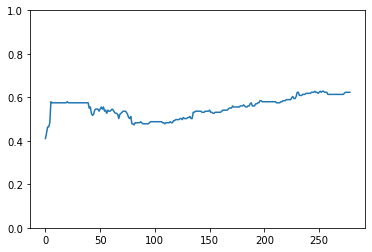

In [19]:
plt.plot(accuracy_scores)
plt.ylim(0, 1)
plt.show()

## PLOT TREE ON DAY -10 AND DAY 269

In [ ]:
tree.plot_tree(clf);

# METRICS (LACE)

In [17]:
feature_names=('Pass','Fail', 'Distinction', 'Withdrawn')
with open("studentTree.dot", 'w') as f:
         f = tree.export_graphviz(clf, out_file=f, feature_names=feature_names)

AttributeError: 'SVC' object has no attribute 'n_features_'

In [ ]:
plt.hist(testArr)

In [ ]:
plt.hist(testArr, density=True,color='indianred',alpha=0.5,bins=20)
#plt.hist(output, normed=True,alpha=0.5,bins=20)

In [ ]:
sns.distplot(testArr,bins=25,
            kde_kws={'color':'indianred','label':'KDE PLOT'},
            hist_kws={'color':'blue','label':"HIST"})

In [ ]:
plt.hist(testArr, density=True,color='indianred',alpha=0.5,bins=20)
plt.hist(trainArr, density=True,alpha=0.5,bins=20)

In [ ]:
sns.heatmap(testArr)